In [53]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/maxdokukin/Politician-Trades/main/Data/data/trades.csv')
df

,Politician Name,Party,Chamber,State,Ticker,Report Gap,Annualized Percentage Profit,Purchase Transaction IDs,Sell Transaction IDs,Total Purchase Amount,Total Sell Amount,Days Between
0,Alan Lowenthal,Democrat,House,CA,ADBE,10,53.158508,[20001623515],"[20003708758, 20003708761]",500.0,16000.0,273
1,Alan Lowenthal,Democrat,House,CA,ADSK,1,-22.391624,[20001623517],"[20003715045, 20003715046]",8000.0,16000.0,351
2,Alan Lowenthal,Democrat,House,CA,BKNG,10,-1.039656,"[20003680753, 20003680755, 20003680757]","[20003708759, 20003708762, 20003708764]",48500.0,48500.0,114
3,Alan Lowenthal,Democrat,House,CA,CCK,8,-42.273518,"[20003718277, 20003718278, 20003752227]","[20003755519, 20003755517]",24000.0,33000.0,231
4,Alan Lowenthal,Democrat,House,CA,COIN,11,-154.015519,[20002050814],[20002008283],8000.0,8000.0,71
...,...,...,...,...,...,...,...,...,...,...,...,...
5316,Zoe Lofgren,Democrat,House,CA,UNH,12,8.079530,"[20003679917, 20003695242]",[20003763725],16000.0,8000.0,654
5317,Zoe Lofgren,Democrat,House,CA,V,12,-2.094481,"[20003679921, 20003695244]",[20003763729],16000.0,8000.0,654
5318,Zoe Lofgren,Democrat,House,CA,VZ,12,-21.542552,[20003695243],[20003763727],8000.0,8000.0,602
5319,Zoe Lofgren,Democrat,House,CA,WMT,21,-61.063459,[20003695245],[20003707011],8000.0,8000.0,41


In [63]:
df['Annualized Percentage Profit'].min()

-2863.003056561835

In [54]:
df.sort_values('Annualized Percentage Profit', inplace=True)

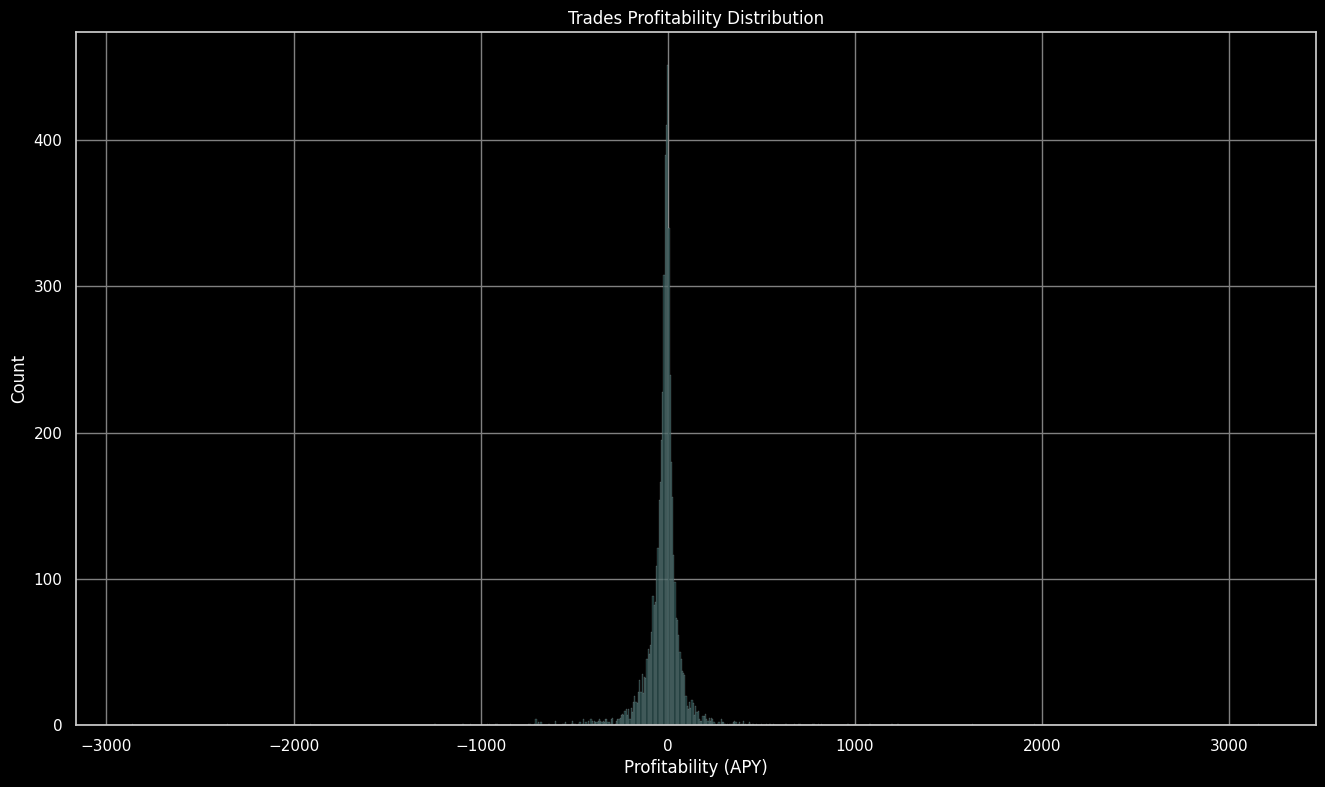

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(16, 9), facecolor='black')
sns.set(style="whitegrid", rc={"axes.facecolor": "black", "grid.color": "gray"})

ax = sns.histplot(df, x='Annualized Percentage Profit', color='#1B4242')
ax.set_facecolor('black')
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel('Profitability (APY)', color='white')
plt.ylabel('Count', color='white')
plt.title('Trades Profitability Distribution', color='white')

plt.show()

<ipython-input-56-79d2f296eaf1>:6: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  ax = sns.barplot(data=avg_apy.head(20),


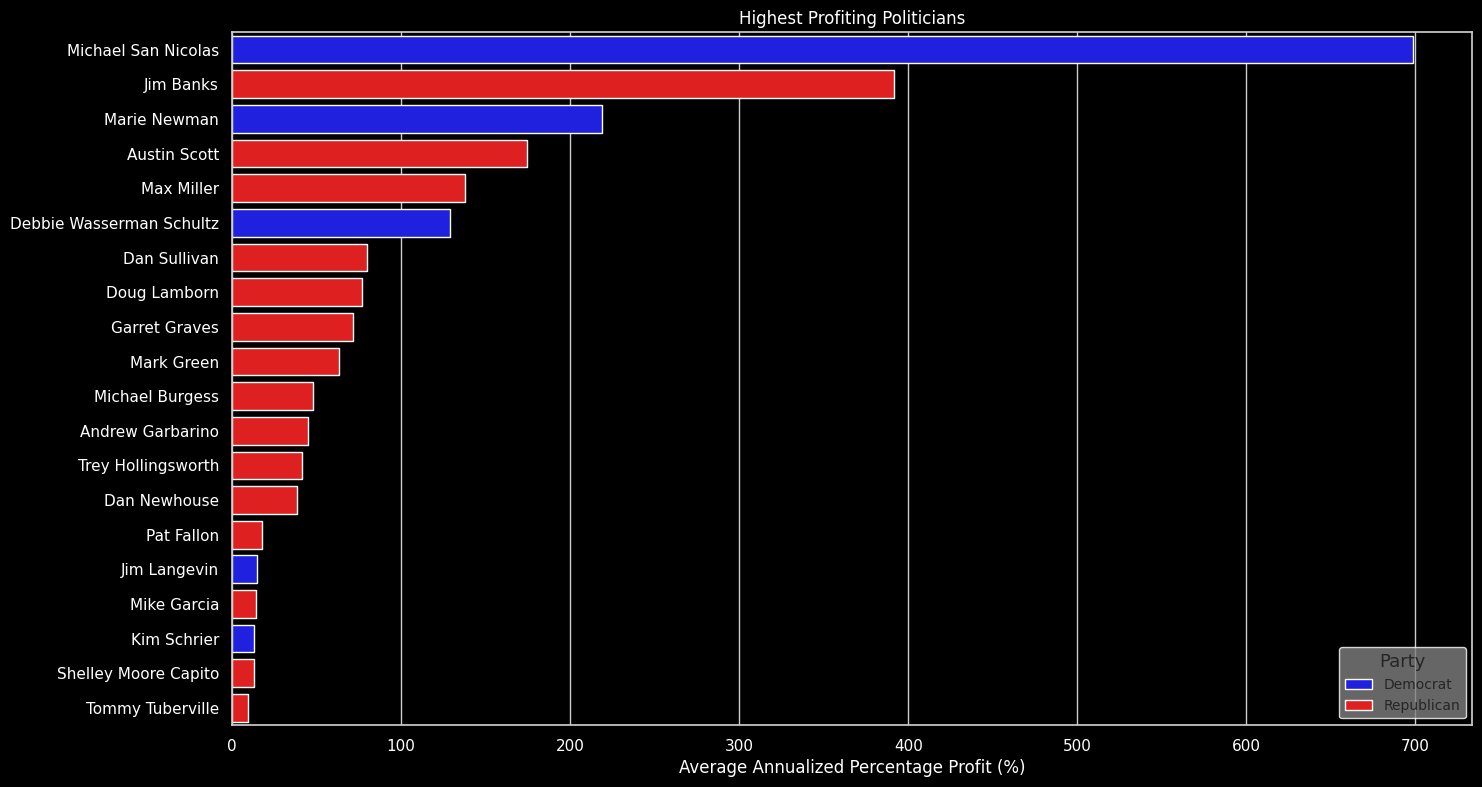

In [56]:
avg_apy = df.groupby('Politician Name')['Annualized Percentage Profit'].mean().sort_values(ascending=False).reset_index(name='Average Annualized Percentage Profit')
avg_apy = avg_apy.merge(df[['Politician Name', 'Party']].drop_duplicates(), on='Politician Name')

plt.figure(figsize=(16, 9), facecolor='black')
sns.set(style="whitegrid", rc={"axes.facecolor": "black"})
ax = sns.barplot(data=avg_apy.head(20),
            y='Politician Name',
            x='Average Annualized Percentage Profit',
            hue='Party',
            palette=['blue', 'red', 'gray'])

ax.set_facecolor('black')
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel('Average Annualized Percentage Profit (%)', color='white')
plt.ylabel('', color='white')
plt.title('Highest Profiting Politicians', color='white')
plt.legend(title='Party', title_fontsize='13', loc='lower left', bbox_to_anchor=(0.887, 0), frameon=True, facecolor='grey', edgecolor='white', fontsize='10')

plt.show()

In [60]:
avg_apy

,Politician Name,Average Annualized Percentage Profit,Party
0,Michael San Nicolas,698.707823,Democrat
1,Jim Banks,391.294139,Republican
2,Marie Newman,218.818598,Democrat
3,Austin Scott,174.645431,Republican
4,Max Miller,137.678352,Republican
...,...,...,...
73,Brian Mast,-98.376521,Republican
74,Jonathan Jackson,-104.498477,Democrat
75,Tomasz Malinowski,-162.903999,Democrat
76,Dan Crenshaw,-249.261175,Republican


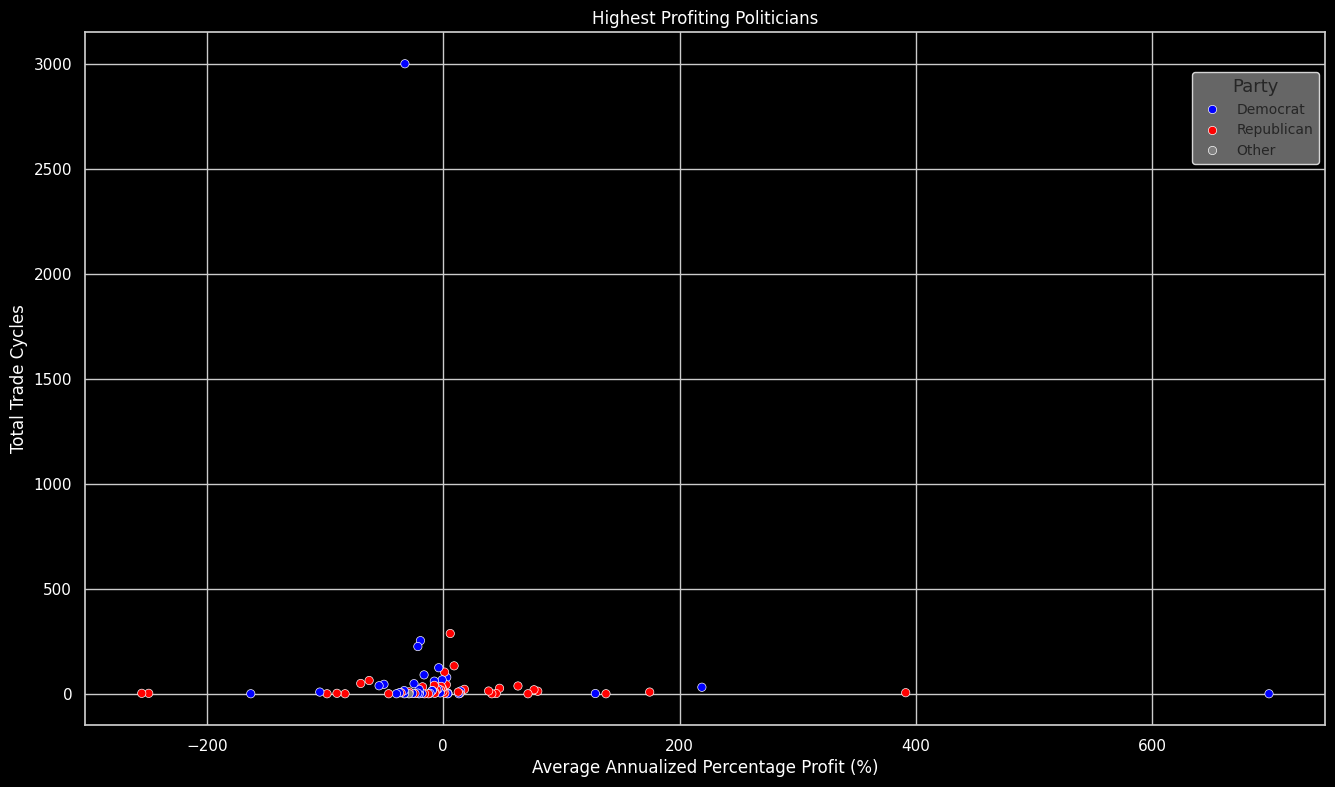

In [57]:
avg_apy_counts = avg_apy.merge(df.groupby('Politician Name').size().reset_index(name='Total Trade Cycles').drop_duplicates(), on='Politician Name')

plt.figure(figsize=(16, 9), facecolor='black')
sns.set(style="whitegrid", rc={"axes.facecolor": "black"})
ax = sns.scatterplot(data=avg_apy_counts,
            y='Total Trade Cycles',
            x='Average Annualized Percentage Profit',
            hue='Party',
            palette=['blue', 'red', 'gray'])

ax.set_facecolor('black')
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel('Average Annualized Percentage Profit (%)', color='white')
plt.ylabel('Total Trade Cycles', color='white')
plt.title('Highest Profiting Politicians', color='white')
plt.legend(title='Party', title_fontsize='13', loc='lower left', bbox_to_anchor=(0.887, 0.8), frameon=True, facecolor='grey', edgecolor='white', fontsize='10')

plt.show()

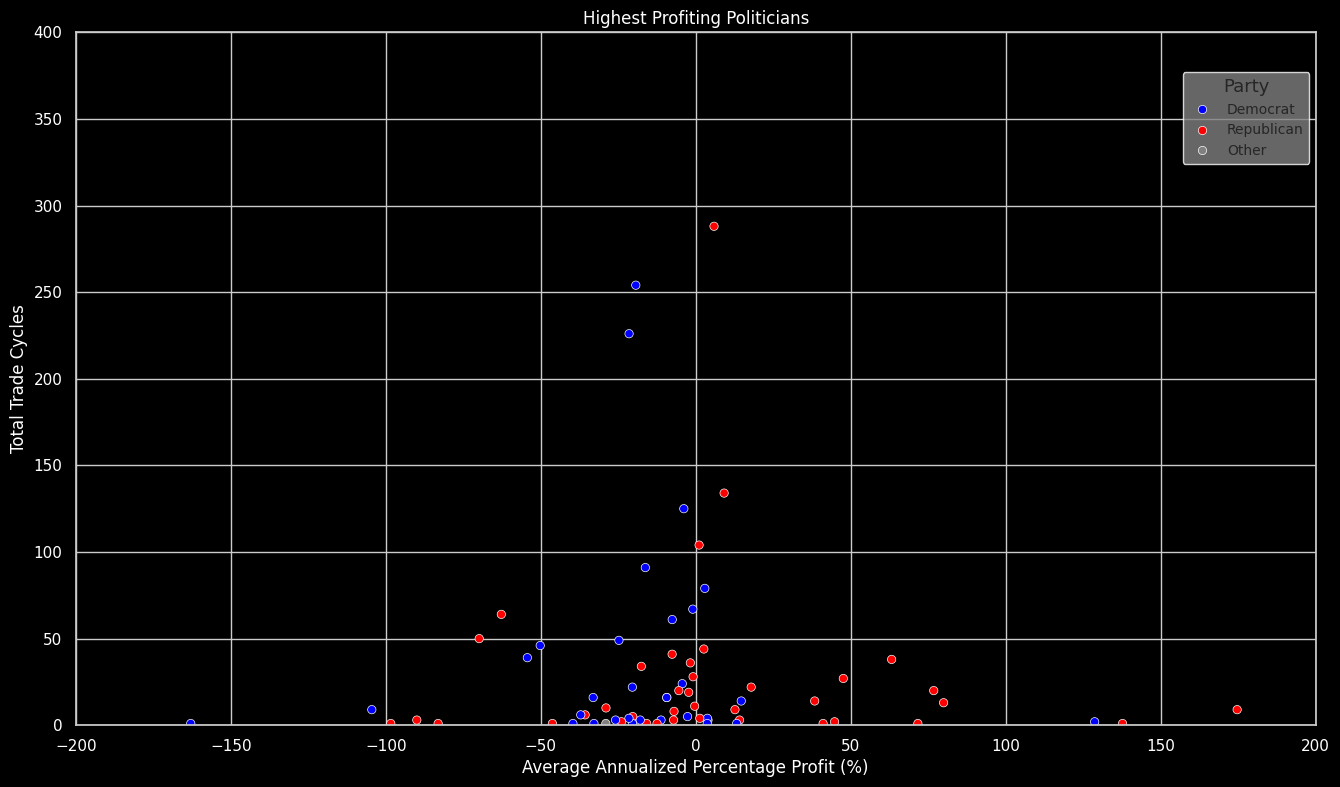

In [58]:
avg_apy_counts = avg_apy.merge(df.groupby('Politician Name').size().reset_index(name='Total Trade Cycles').drop_duplicates(), on='Politician Name')

plt.figure(figsize=(16, 9), facecolor='black')
sns.set(style="whitegrid", rc={"axes.facecolor": "black"})
ax = sns.scatterplot(data=avg_apy_counts,
            y='Total Trade Cycles',
            x='Average Annualized Percentage Profit',
            hue='Party',
            palette=['blue', 'red', 'gray'])

plt.xlim(-200, 200)
plt.ylim(0, 400)
ax.set_facecolor('black')
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel('Average Annualized Percentage Profit (%)', color='white')
plt.ylabel('Total Trade Cycles', color='white')
plt.title('Highest Profiting Politicians', color='white')
plt.legend(title='Party', title_fontsize='13', loc='lower left', bbox_to_anchor=(0.887, 0.8), frameon=True, facecolor='grey', edgecolor='white', fontsize='10')

plt.show()

In [65]:
avg_apy_counts['Average Annualized Percentage Profit'].max()

698.7078233866196